In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision
import torchvision.transforms as transforms

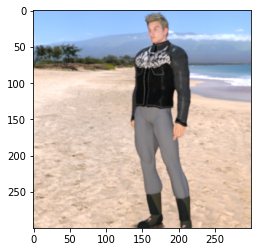

In [5]:
image_array = np.array(Image.open('/content/drive/MyDrive/horse classifier data/horse-or-human/horse-or-human/train/humans/human11-06.png'))
plt.imshow(image_array)

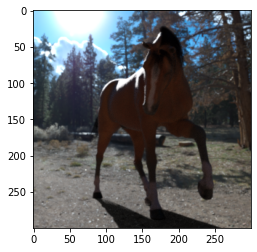

In [7]:
image_array2 = np.array(Image.open('/content/drive/MyDrive/horse classifier data/horse-or-human/horse-or-human/train/horses/horse11-6.png'))
plt.imshow(image_array2)

In [8]:
transform = transforms.Compose([transforms.RandomCrop([225]), 
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [9]:
data_dir = "/content/drive/MyDrive/horse classifier data/horse-or-human/"

train_set = torchvision.datasets.ImageFolder(root = "/content/drive/MyDrive/horse classifier data/horse-or-human/horse-or-human/train/", transform = transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size = 4, shuffle = True, num_workers = 2)

validation_set = torchvision.datasets.ImageFolder(root = "/content/drive/MyDrive/horse classifier data/horse-or-human/horse-or-human/validation/", transform = transform)

validation_loader = torch.utils.data.DataLoader(validation_set, batch_size = 4, shuffle = True, num_workers = 2)

classes = ("horse", "human")

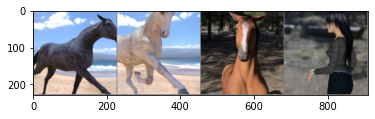

horse horse horse human


In [10]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
data_iter = iter(train_loader)
images, labels = data_iter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 53 * 53, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 53 * 53)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [12]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum = 0.9)

In [13]:
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 200 == 199:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    
print("Training finished")

[1,   200] loss: 0.092
[2,   200] loss: 0.054
[3,   200] loss: 0.046
[4,   200] loss: 0.034
[5,   200] loss: 0.029
Training finished


In [17]:
PATH = '/content/horse_net.pth'
torch.save(net.state_dict(), PATH)

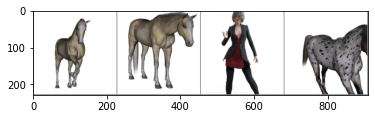

GroundTruth:  horse horse human horse


In [19]:
vali_iter = iter(validation_loader)
images, labels = vali_iter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [20]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

In [21]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  human human human horse


In [22]:
correct = 0
total = 0

with torch.no_grad():
    for data in validation_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(100*correct/total)

81.25


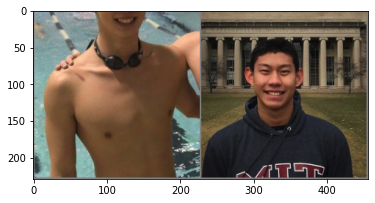

In [24]:
test_set = torchvision.datasets.ImageFolder(root = "/content/drive/MyDrive/horse classifier data/test", transform = transform)

test_loader = torch.utils.data.DataLoader(test_set, batch_size = 2, shuffle = True, num_workers = 2)


test_iter = iter(test_loader)
images, labels = test_iter.next()

imshow(torchvision.utils.make_grid(images))

In [25]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(2)))

Predicted:  horse human
